In [1]:
import plotly.offline as offline       # a number of plotly goodies
import plotly.plotly as py
import plotly.graph_objs as go


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

8953
number of CASINO BSE electrons 8440


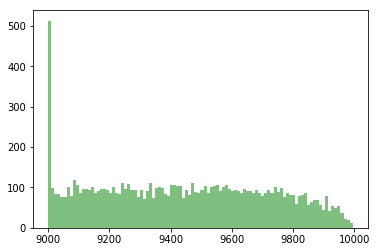

In [2]:
file = 'CASINO/E.dat'
# regex the backscattered eletron data
# sed -n '/'^yes'/,/'---'/p' > BSE_10kV.dat
# sed '/^yes/d' BSE_10kV.dat > BSe_10kV_data.dat
df = pd.read_csv(file,  sep='\t', index_col=None, header = None, error_bad_lines=False)
#print 'header'
energy_CASINO = df.loc[:, 6].values
print len(energy_CASINO)
print 'number of CASINO BSE electrons', len(energy_CASINO[energy_CASINO>9.01])
num_bins = 100
n_C, bins_C, patches_C = plt.hist(energy_CASINO*1000., num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_C[i] + bins_C[i+1]) for i in range(len(n_C))]

trace_CASINO = go.Scatter(x = bins_mean, 
                          y = n_C, 
                          marker=dict(
                               color = 'rgba(127, 201, 127, .9)',),
                          name = 'CASINO',)
#trace_CASINO = go.Histogram(x=energy_CASINO*1000., 
#                           name='casino', 
#                          autobinx = False,
#                          marker=dict(
#                          color = 'rgba(2, 12, 193, .9)',), 
#                          xbins =dict(start = 5000., 
#                                 end = 30000., 
#                                 size = 1, ),
#                           )


In [3]:
file_discr = 'BSE_70tilt_ds_MCMLCS.out'

BSE_discr = []
with open(file_discr) as f:
    lines = f.read().splitlines()
BSE_discr = [float(line) for line in lines]
print 'number of discretly scattered BSE', len(BSE_discr)

n_d, bins_d, patches_d = plt.hist(BSE_discr, num_bins, facecolor='blue', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d))]

trace_discr = go.Scatter(x = bins_mean, 
                         y = n_d, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)

#trace_discr = go.Histogram(x=BSE_discr, 
#                          name = 'discrete', 
#                          autobinx = False,
#                          marker=dict(
#                         color = 'rgba(2, 182, 193, .9)',), 
#                          xbins =dict(start = 5000., 
#                                 end = 30000., 
#                                 size = 1, ),
                          #histnorm='probability'
#                          )



file_cont = 'BSE70tiltcont.out'

BSE_cont = []
with open(file_cont) as f:
    lines = f.read().splitlines()
BSE_cont = [float(line) for line in lines]

print 'number of continuously scattered BSE', len(BSE_cont)

n_c, bins_c, patches_c = plt.hist(BSE_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt')

IOError: [Errno 2] No such file or directory: 'BSE_70tilt_ds_MCMLCS.out'

Keys: ['energy' 'x_dir' 'y_dir' 'z_dir']


IOError: Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

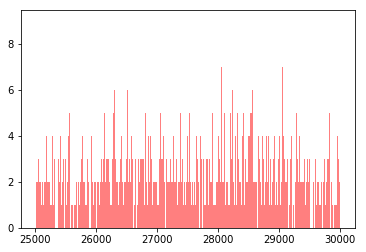

In [8]:
import h5py
file_name = 'data/BSE70tiltcont.h5'
h5data = h5py.File(file_name,'r+')   
print("Keys: %s" % h5data['BSE']['axis1'][:])

energycont = h5data['BSE']['block0_values'][0]


n_c, bins_c, patches_c = plt.hist(energycont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_discr = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt')




file_name = 'data/BSE70tiltDS.h5'
h5data = h5py.File(file_name,'r+')   
print("Keys: %s" % h5data['BSE']['axis1'][:])

energyDS = h5data['BSE']['block0_values'][0]


n_c, bins_c, patches_c = plt.hist(energyDS, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt at 30')


In [ ]:
BSE70tiltcont.out

In [38]:
file = 'positions_70tilt_cont.out'

num_el = 200
pos = []
el = -1
x = [[] for i in range(num_el)]
y = [[] for i in range(num_el)]
z = [[] for i in range(num_el)]

 
with open(file) as f:
    lines = f.read().splitlines()

    for line in lines:
        pos = ([float(i) for i in line.strip('[').strip(']').split()])

        if (pos[2] == 0.0):
            el += 1
            x[el].append(pos[0])
            y[el].append(pos[1])
            z[el].append(-pos[2])
        else:
            x[el].append(pos[0])
            y[el].append(pos[1])
            z[el].append(-pos[2])


IndexError: list index out of range

In [29]:
data = []
trace = [[] for i in range(num_el)]
for i in range(0, 15):

    trace[i] = go.Scatter(
        x = x[i],
        y = z[i],
        mode = 'lines+markers', 
        name = 'electron '+str(i)
    )
    data.append(trace[i])

layout = go.Layout(
    title = '20 kV incident electrons on a 50 degrees tilted Al sample', 
    font=dict( color='#7f7f7f'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(
        gridcolor= '#7f7f7f', 
        title = 'z(A)', 
        zerolinecolor='#ffffff'
        #autorange='reversed'
    ), 
    xaxis=dict(
        gridcolor= '#7f7f7f',
        title = 'x(A)', 
        zerolinecolor='#969696'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='xz_scater')

In [60]:
el = 4
trace = go.Scatter3d(
    x=x[el],
    y=y[el],
    z=z[el],
    mode='line',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=3,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-one_electron')

In [20]:
file_tR = 'thetaR_50tilt.out'

thetaR = []
with open(file_tR) as f:
    lines = f.read().splitlines()
thetaR = [float(line) for line in lines]


file_tG = 'thetaG_50tilt.out'

thetaG = []
with open(file_tG) as f:
    lines = f.read().splitlines()
thetaG = [float(line) for line in lines]


file_tM = 'thetaM_50tilt.out'

thetaM = []
with open(file_tM) as f:
    lines = f.read().splitlines()
thetaM = [float(line) for line in lines]


file_pR = 'phiR_50tilt.out'

phiR = []
with open(file_pR) as f:
    lines = f.read().splitlines()
phiR = [float(line) for line in lines]


file_pG = 'phiG_50tilt.out'

phiG = []
with open(file_pG) as f:
    lines = f.read().splitlines()
phiG = [float(line) for line in lines]

file_pM = 'phiM_50tilt.out'

phiM = []
with open(file_pM) as f:
    lines = f.read().splitlines()
phiM = [float(line) for line in lines]



print len(phiM), len(thetaM)
print len(phiG), len(thetaG)
data_thetaR = [go.Histogram(x = np.degrees(thetaR), 
                      name = 'theta Rutherford')      
       ]

data_phiR = [go.Histogram(x = phiR, 
                      name = 'phi Rutherford')      
       ]
        
data_thetaG = [go.Histogram(x = np.degrees(thetaG), 
                          autobinx = False,
                         #xbins =dict(start = 0., 
                         #        end = 1.57, 
                         #        size = 0.01571, ) , 
                             histnorm='probability',
                             name = 'theta Gryzinski'), 
              ]


data_phiG = [go.Histogram(x = phiG, 
                          autobinx = False,
                         xbins =dict(start = 0., 
                                 end = 6.28, 
                                 size = 0.7854, ) , 
                      name = 'phi Gryzinski')      
       ]               
               
    
data_thetaM = [go.Histogram(x = np.degrees(thetaM), 
                          autobinx = False,
                         #xbins =dict(start = 0., 
                         #        end = 1.57, 
                         #        size = 0.01571, ) , 
                             histnorm='probability',
                     name = 'theta Moller'), 
              ]


data_phiM = [go.Histogram(x = phiM, 
                          autobinx = False,
                         xbins =dict(start = 0., 
                                 end = 3.14, 
                                 size = 0.1571, ) , 
                         name = 'phi Moller')      
       ]               

py.iplot(data_thetaG, filename='polar angles')

#print data_thetaG[0]['x']

11971 11971
5653 5653


In [21]:
py.iplot(data_thetaM, filename='polar angles')

In [190]:
import numpy as np
from math import acos

x = np.random.rand(10000)

alpha =  3.4*(13.**(0.67))/(20000.)


c_Theta = (1. - (2.*alpha*x)/(1. + alpha - x))
c2_halfTheta =  1.-(alpha*x /(1. + alpha-x))

print min(c_Theta), max(c_Theta)
print np.arccos(max(c_Theta)), np.arccos(min(c_Theta))
print c_Theta[0:10]
print np.arccos(c_Theta[0:10])

hist_thetaR_or = np.histogram(np.degrees([acos(cosValue) for cosValue in c_Theta]), density=True)

data_thetaR_or = [go.Scatter(x = hist_thetaR_or[1]+9,
                             y = hist_thetaR_or[0], 
                             #nbinsx = 100, 
                             name = 'theta R'), 
              ]
               
    
data_thetaR = [go.Histogram(x = np.degrees(2.*np.arccos(c2_halfTheta**0.5)), 
                             nbinsx = 100, 
                             name = 'theta R'), 
              ]
               
               
py.iplot(data_thetaR_or, filename='polar angles')

-0.741652546863333 0.9999998156620046
0.0006071869581719088 2.406326945616268
[0.99994852 0.9896637  0.99904666 0.98309125 0.99861368 0.9948864
 0.99952285 0.99992426 0.99983678 0.99870184]
[0.01014698 0.14390384 0.04366903 0.18415548 0.05266196 0.10117274
 0.03089288 0.01230764 0.01806774 0.05095959]


In [191]:
py.iplot(data_thetaR, filename='polar angles')

In [61]:
py.iplot(data_phiG, filename='polar angles')

In [172]:


data = [
    go.Scatterpolar(
        r = df['x1'],
        theta = df['y'],
        mode = 'lines',
        name = 'Figure8',
        line =  dict(
            color = 'peru'
        )
    ),
    go.Scatterpolar(
        r = df['x2'],
        theta = df['y'],
        mode = 'lines',
        name = 'Cardioid',
        line =  dict(
            color = 'darkviolet'
        )
    ),
    go.Scatterpolar(
        r = df['x3'],
        theta = df['y'],
        mode = 'lines',
        name = 'Hypercardioid',
        line =  dict(
            color = 'deepskyblue'
        )
    ),
    go.Scatterpolar(
        r = df['x4'],
        theta = df['y'],
        mode = 'lines',
        name = 'orangered',
        line =  dict(
            color = 'orangered'
        )
    ),
    go.Scatterpolar(
        r = df['x5'],
        theta = df['y'],
        mode = 'lines',
        name = 'Supercardioid',
        line =  dict(
            color = 'green'
        )
    )
]

layout = go.Layout(
    title = 'Mic Patterns',
    font = dict(
        family = 'Arial, sans-serif;',
        size = 12,
        color = '#000'
    ),
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'polar-line')

AttributeError: 'module' object has no attribute 'Scatterpolar'